In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA



In [5]:
import pandas as pd

df = pd.read_csv("Practice_simple_expression.csv", index_col=0)
df


,sample1,sample2,sample3,sample4
gene,,,,
GeneA,10,12,30,28
GeneB,5,6,40,42
GeneC,20,18,22,25
GeneD,50,48,15,20


In [7]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, GeneA to GeneD
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   sample1  4 non-null      int64
 1   sample2  4 non-null      int64
 2   sample3  4 non-null      int64
 3   sample4  4 non-null      int64
dtypes: int64(4)
memory usage: 160.0+ bytes


In [9]:
x = df.values.T  # Transpose to have samples as rows
x 


array([[10,  5, 20, 50],
       [12,  6, 18, 48],
       [30, 40, 22, 15],
       [28, 42, 25, 20]])

In [10]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
pc_values = pca.fit_transform(x)
pc_values

array([[-26.71467215,   1.00950612],
       [-24.24331204,  -1.19195067],
       [ 26.55927838,  -2.95274393],
       [ 24.39870581,   3.13518848]])

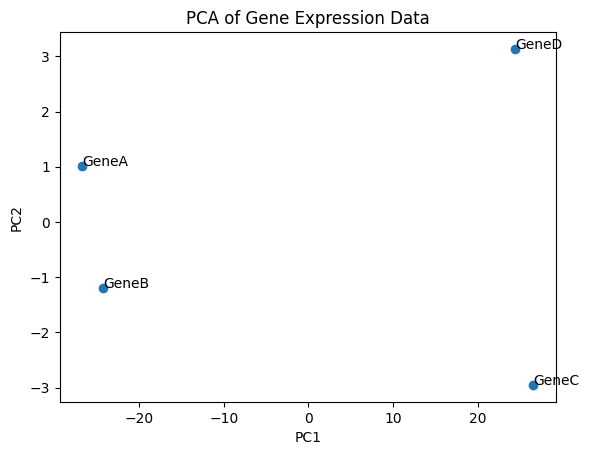

In [14]:
import matplotlib.pyplot as plt
plt.scatter(pc_values[:,0], pc_values[:,1])

for i, gene in enumerate(df.index):
    plt.text(pc_values[i,0], pc_values[i,1], gene)
    
plt.xlabel("PC1")
plt.ylabel("PC2")   
plt.title("PCA of Gene Expression Data")
plt.show()  


In [15]:
pca.explained_variance_ratio_



array([0.99156102, 0.0079977 ])

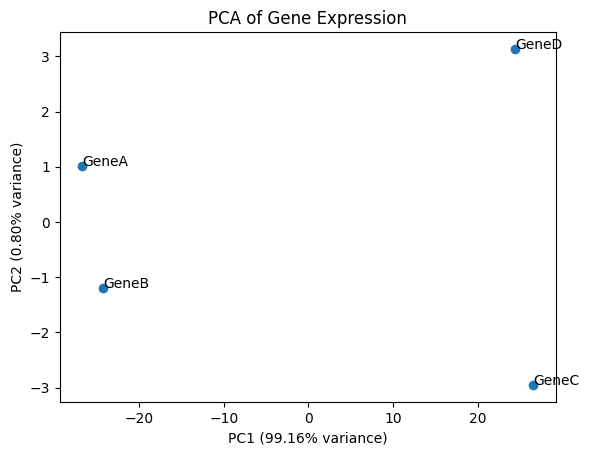

In [16]:
plt.scatter(pc_values[:, 0], pc_values[:, 1])

for i, gene in enumerate(df.index):
    plt.text(pc_values[i, 0], pc_values[i, 1], gene)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.title("PCA of Gene Expression")
plt.show()



In [17]:
import numpy as np
from scipy.stats import ttest_ind

# Define groups
group1 = df[["sample1", "sample2"]]
group2 = df[["sample3", "sample4"]]

# Run t-test for each gene
t_values, p_values = ttest_ind(group1, group2, axis=1)

# Combine results into a table
de_results = pd.DataFrame({
    "gene": df.index,
    "t_value": t_values,
    "p_value": p_values
}).set_index("gene")

de_results


,t_value,p_value
gene,,
GeneA,-12.727922,0.006116
GeneB,-31.752165,0.000990
GeneC,-2.496151,0.129937
GeneD,11.698806,0.007228
